![](https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472)

# <center>Solución numérica del modelo no simplificado del péndulo</center>

# <center>Jose Manuel Ramirez Araiza 747818 jose.ramireza@iteso.mx</center>
# <center>Jose Armando Borregui Vidrio 727516 im727516@iteso.mx</center>
# <center>Oswaldo Ordaz Madrazo 745950 jonathan.valencia@iteso.mx</center>

# <center>27 de noviembre del 2023</center>


## Objetivo general:
Analizar y resolver el modelo del péndulo simple, considerando sus aspectos y características específicas, con el objetivo de compararlo con su contraparte que no muestra amortiguamiento.

## Objetivos específicos:
>- **Desarrollar el Modelo No Simplificado del Péndulo:**
   Evaluar el modelo de péndulo simple.

>- **Comparar ambos movimientos:**
   Comparar el movimiento de un péndulo simple con el movimiento de un péndulo bajo la acción de una fuerza de rozamiento proporcional.

>- **Explorar Sensibilidades de Parámetros:**
   Variaremos los parámetros del modelo, con el fin de comprender cómo cambios en estas variables afectan el movimiento del péndulo y explorar posibles.

>- **Validar Resultados Numéricos:**
   Comparar y validar los resultados obtenidos mediante simulaciones numéricas con soluciones analíticas existentes. 

>- **Evaluar Influencia del Amortiguamiento:**
   Investigar el impacto del amortiguamiento en el sistema del péndulo, analizando cómo estas características afectan la estabilidad, las oscilaciones y otros comportamientos dinámicos comparando con el modelo de péndulo visto en clase.


## Modelo que representa el problema
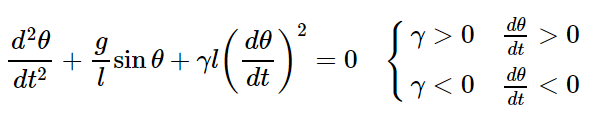

## Solución del problema de optimización

# Pruebas

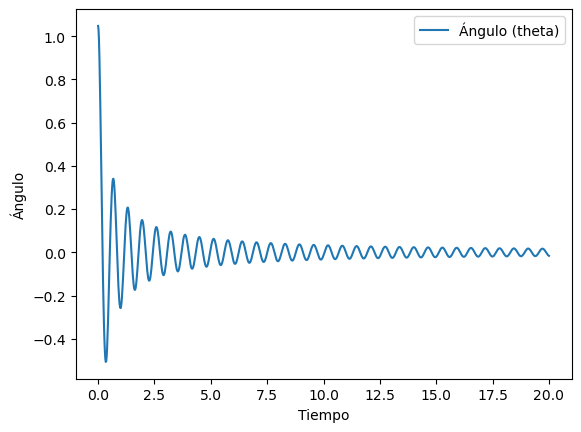

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.315e-06 ...  2.000e+01  2.000e+01]
        y: [[ 1.047e+00  1.047e+00 ... -1.555e-02 -1.556e-02]
            [ 0.000e+00 -7.064e-04 ... -6.002e-02 -5.990e-02]
            [ 0.000e+00 -7.064e-04 ... -4.418e+00 -4.418e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 120020
     njev: 0
      nlu: 0

In [4]:
#PÉNDULO CON MASA Y FORMA DE PELOTA CON 2 PLUGADAS DE RADIO
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np 
from scipy.integrate import solve_ivp, odeint

# Parámetros del sistema
g = 9.81
l = 0.1  # longitud del péndulo en metros
r = 0.05  # radio de la esfera en metros (2 pulgadas convertidas a metros)
m = 0.5  # masa de la esfera en kg

# Constantes adicionales
A = np.pi * r**2  # Área de la esfera
rho = 1.2  # Densidad del aire en kg/m^3
Cd = 0.47  # Coeficiente de arrastre para una esfera

# Constantes para las ecuaciones de movimiento
w0 = np.sqrt(g / l)  # frecuencia angular rad/s
k = 0.7  # gamma·l, constante de amortiguamiento
C = 0.5 * Cd * rho * A / m  # Constante de fricción del aire

# Condiciones iniciales
theta0 = np.pi / 3  # ángulo inicial
omega0 = 0  # velocidad angular inicial
v0 = 0  # velocidad lineal inicial

# Definir la función de las ecuaciones de movimiento
def fun(t, X):
    theta = X[0]
    omega = X[1]
    v = X[2]
    
    d2theta = -k * omega * np.abs(omega) - w0**2 * np.sin(theta)  # Ecuación de movimiento sin fricción del aire
    dv = -C * v - g / l * np.sin(theta)  # Ecuación de movimiento para la esfera con fricción del aire
    
    return np.array([omega, d2theta, dv])

# Definir el intervalo de tiempo
t_span = [0, 20]

# Condiciones iniciales
x0 = np.array([theta0, omega0, v0])

# Resolver las ecuaciones de movimiento
sol = solve_ivp(fun, t_span, x0, method='RK45', dense_output=True)

# Graficar la solución
t = np.linspace(t_span[0], t_span[1], 1000)
sol_values = sol.sol(t)
plt.plot(t, sol_values[0], label='Ángulo (theta)')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.legend()
plt.show()
x = solve_ivp(fun,t_span, x0, max_step=0.001)
x

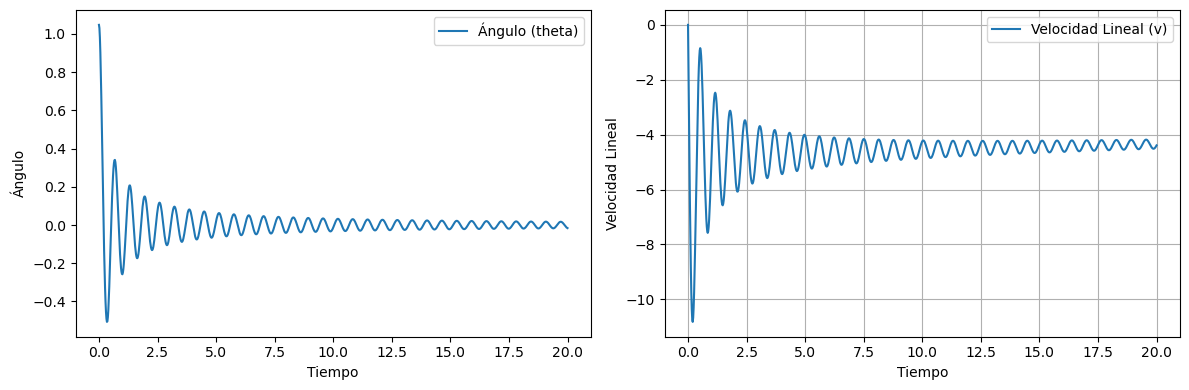

In [5]:
t = np.linspace(t_span[0], t_span[1], 1000)
sol_values = sol.sol(t)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(t, sol_values[0], label='Ángulo (theta)')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.legend()

# Graficar la solución de la velocidad lineal
plt.subplot(1, 2, 2)
plt.plot(t, sol_values[2], label='Velocidad Lineal (v)')
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Velocidad Lineal')
plt.legend()

plt.tight_layout()
plt.show()

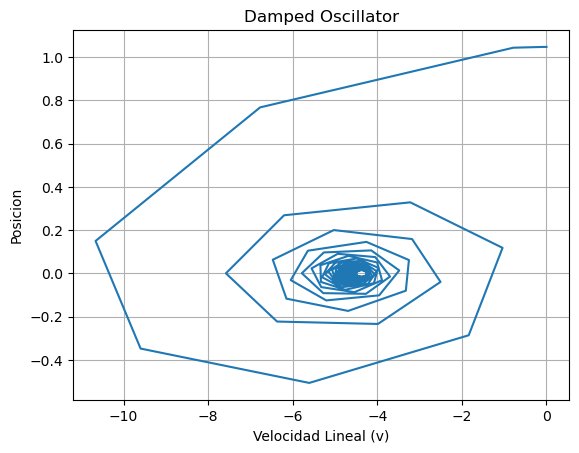

In [7]:
plt.plot(sol.y[2,:], sol.y[0,:])
plt.grid(True)
plt.xlabel('Velocidad Lineal (v)')
plt.ylabel('Posicion')
plt.title('Damped Oscillator')
plt.show()

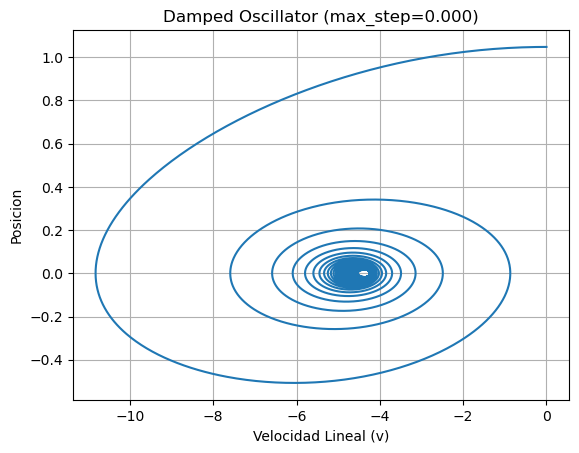

In [11]:

# Resolver las ecuaciones de movimiento con un max_step específico
sol = solve_ivp(fun, t_span, x0, method='RK45', dense_output=True, max_step=0.001)

# Graficar la posición en función de la velocidad lineal
plt.plot(sol.y[2, :], sol.y[0, :])
plt.grid(True)
plt.xlabel('Velocidad Lineal (v)')
plt.ylabel('Posicion')
plt.title(f'Damped Oscillator (max_step={sol.t[1] - sol.t[0]:.3f})')
plt.show()

# Fin de pruebas

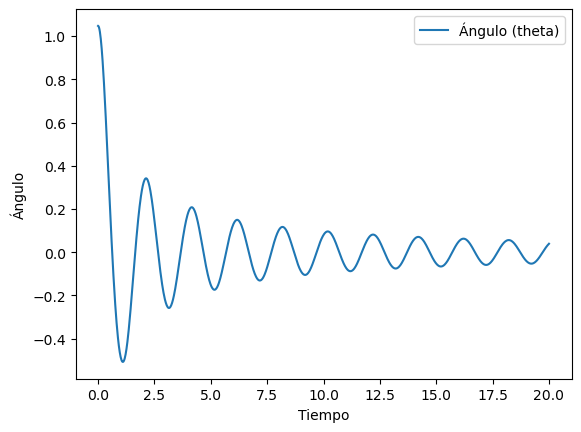

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.315e-05 ...  2.000e+01  2.000e+01]
        y: [[ 1.047e+00  1.047e+00 ...  3.815e-02  3.816e-02]
            [ 0.000e+00 -7.064e-04 ...  1.044e-01  1.044e-01]
            [ 0.000e+00 -7.064e-04 ...  7.811e-02  7.808e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 120014
     njev: 0
      nlu: 0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81
l = 1
m = 1  # masa del peso
w0 = np.sqrt(g / l)  # frecuencia angular rad/s
k = 0.7  # gamma·l, constante de amortiguamiento
x0 = np.pi / 3  # ángulo inicial

def fun(t, X):
    # t es un escalar
    # X es un arreglo que contiene theta, v, y w (para el peso)
    theta = X[0]
    v = X[1]
    w = X[2]
    
    d2x = -k * v * np.abs(v) - w0**2 * np.sin(theta)  # ecuación de movimiento sin fricción del aire
    dw = -k * w - g / l * np.sin(theta)  # ecuación de movimiento para el peso
    
    return np.array([v, d2x, dw])

tspan = [0, 20]
x0 = np.array([np.pi / 3, 0, 0])  # [ángulo inicial, velocidad inicial, velocidad inicial del peso]

sol = solve_ivp(fun, t_span, x0, method='RK45', dense_output=True)

# Graficar la solución
t = np.linspace(t_span[0], t_span[1], 1000)
sol_values = sol.sol(t)
plt.plot(t, sol_values[0], label='Ángulo (theta)')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.legend()
plt.show()
x = solve_ivp(fun,tspan, x0, max_step=0.001)
x

In [4]:
g = 9.81
l = 1
w0 = np.sqrt(g/l)  # angular frequency rad/s
k = 0.7  # gamma·l, damping constant
x0 = np.pi / 3  # initial angle


def fun(t, X) :
    # t es un escalar
    # X es un arreglo que contiene x y dx
    theta = X[0]
    v = X[1]
    d2x = -k *    v**2 * np.sign(v) -w0**2 * np.sin(theta)  
    return np.array([v, d2x])

tspan =[0, 20]
x0 = np.array([np.pi/3, 0])

In [5]:
x = solve_ivp(fun,tspan, x0, max_step=0.001)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.176e-04 ...  2.000e+01  2.000e+01]
        y: [[ 1.047e+00  1.047e+00 ...  3.807e-02  3.816e-02]
            [ 0.000e+00 -9.990e-04 ...  1.047e-01  1.044e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 120008
     njev: 0
      nlu: 0

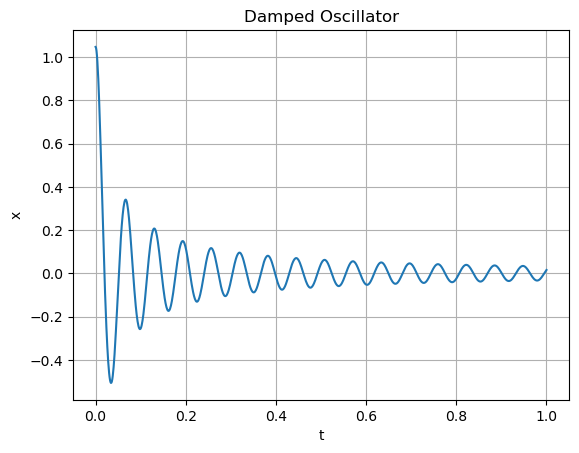

In [15]:
plt.plot(t_eval, sol[:, 0])
plt.grid(True)
plt.xlabel('t')
plt.ylabel("x")
plt.title('Damped Oscillator')
plt.show()

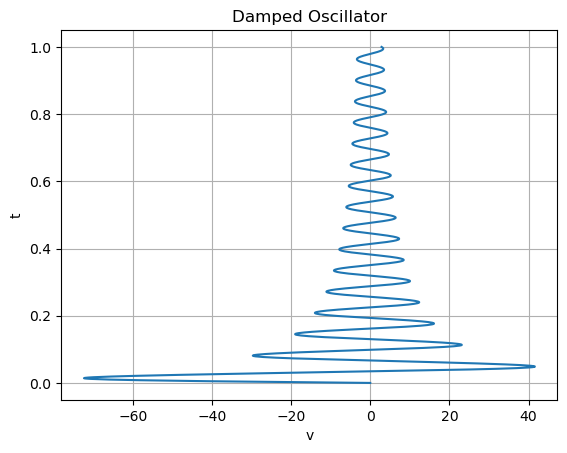

In [14]:
plt.plot(sol[:, 1],t_eval)
plt.grid(True)
plt.xlabel('v')
plt.ylabel("t")
plt.title('Damped Oscillator')
plt.show()

In [10]:
import numpy as np
from scipy.optimize import fsolve

k = 0.25  # friction
v_max = np.sqrt((1 + 2 * k * np.exp(k * np.pi)) / (1 + 4 * k**2))
print(v_max)

v0 = 1  # initial velocity

def f(x):
    return v0**2 * (1 + 4 * k**2) + (np.cos(x) - 2 * k * np.sin(x)) * np.exp(2 * k * x) - 1

th_1 = fsolve(f, [0, np.pi/2])
print(th_1 * 180 / np.pi)

1.2951108139055925
[-55517.35547445     70.38394905]


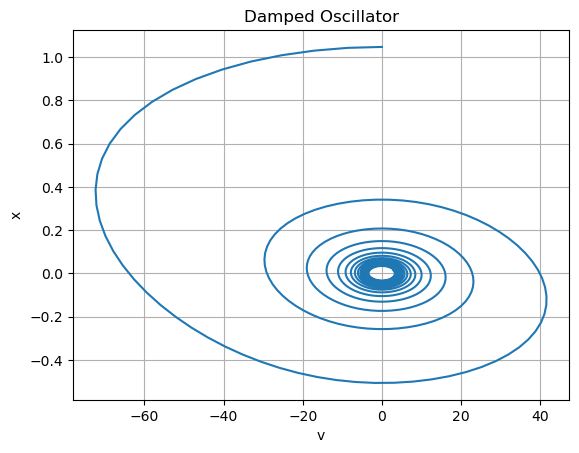

In [16]:
plt.plot(sol[:, 1],sol[:, 0])
plt.grid(True)
plt.xlabel('v')
plt.ylabel("x")
plt.title('Damped Oscillator')
plt.show()

## Conclusiones
En conclusión, el estudio del péndulo simple y su contraparte con amortiguamiento ha proporcionado una comprensión más profunda de los fenómenos dinámicos asociados con estos sistemas. A través del análisis y la resolución de modelos, se ha evaluado el comportamiento del péndulo simple y se ha comparado con un modelo más complejo que incorpora fuerzas de rozamiento. La exploración de sensibilidades de parámetros ha permitido comprender cómo cambios en estas variables impactan el movimiento del péndulo, proporcionando información valiosa sobre la influencia de factores específicos en la dinámica del sistema.

La validación de resultados numéricos mediante simulaciones ha demostrado la consistencia y precisión de los modelos propuestos, al compararlos con soluciones analíticas conocidas. Además, al evaluar la influencia del amortiguamiento en el sistema del péndulo, se ha revelado cómo estas características afectan la estabilidad, las oscilaciones y otros comportamientos dinámicos. 

# Referencias
Marko V Lubarda, Vlado A Lubarda. An analysis of pendulum motion in the presence of quadratic and linear drag. Eur. J. Phys. 42 (2021) 055014